# NYPD Civilian Complaints
This project contains data on 12,000 civilian complaints filed against New York City police officers. Interesting questions to consider include:
- Does the length that the complaint is open depend on ethnicity/age/gender?
- Are white-officer vs non-white complaintant cases more likely to go against the complainant? 
- Are allegations more severe for cases in which the officer and complaintant are not the same ethnicity?
- Are the complaints of women more succesful than men (for the same allegations?)

There are a lot of questions that can be asked from this data, so be creative! You are not limited to the sample questions above.

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers).

Note: you don't need to provide any information to obtain the data. Just agree to the terms of use and click "submit."

### Cleaning and EDA
- Clean the data.
    - Certain fields have "missing" data that isn't labeled as missing. For example, there are fields with the value "Unknown." Do some exploration to find those values and convert them to null values.
    - You may also want to combine the date columns to create a `datetime` column for time-series exploration.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

### Assessment of Missingness
- Assess the missingness per the requirements in `project03.ipynb`

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
In this data set, it contains more than 12,000 civilian complaints filed against New York City. It contains the person's complaint id, name, time received and closed, and some basic informations like gender, allegation, ages. 
So as to investigate the meanings of gender and ethnicity, specifically:

1)Are white-officer vs non-white complaintant cases more likely to go against the complainant?

2)Are the complaints of women more succesful than men (for the same allegations?)

in this project, we will mostly focus on the variable related to gender(complainant_gender,mos_gender) and ethnicity(complainant_ethnicity, mos_ethnicity) with the help of assessment of missingness and hypothsis test.

### Cleaning and EDA
In this part,fisrt slicing the dataframe making sure it only contains the information that we needed, like gender, age, ethnicity.This will make the following process and analysis easier. Don't need to pay much attentation on other useless variables. Then correct some data points with weird meaning, like negative ages. And categorize the "complainant_ethnicity" changing Unknown and refused to np.NaN. This will helpful when assessing the missingness and do the hypothsis test. Lastly create a new column to store if the result is substantiated, where 1 means yes, and 0 means no. This will be helpful when do the numerical analyizing in the following.

In Univariate Analysis, histogram, density curve and pie chart are used to gain and show some basic information and behaviors about the variables that we focused on. To be more specific, gender, ethnicity and age. Then we found that gender shows consistency but ethnicity does not.


And in Bivariate Analysis and Groupby, we use box plot, dataframe and some numerical analysis and find some thing different. In mos_gender, the female has a higher ratio of result of the case is substatiated. But this result changed when we focus on complainant gender. And ethnicity have the consistency in this part.


### Assessment of Missingness
In this part, we set significance level as 0.05 as default and we assessed and did three tests:

Complainant ethnicity and complainant age:

    * Since they are not both categorical variables, so the ks test are the best to be used here to do the permutation test. And the p-value is smaller than the default 0.05 so we reject the null. And can conclude that these the missingness of ethnicity is dependent on complainant age.

Complainant gender and complainant age:

    * Same as the first assessment, so the ks test are the best to be used here to do the permutation test. And the p-value is smaller than the default 0.05 so we reject the null.

Complainant gender and substantiated:

    * Since both variable are categorical variable, so the tvd test should be used. And we get the p-value as 0.096 which is larger tha 0.05. So we keep the null and can conclude that the missingness of complainant gender is independent of susstantiated cariable.
    

So from all above three tests, we can say the missingness of both gender and ethnicity are dependent on complainat age. So that might because some people at some specific ages are not likely to show or fill the gender and ethnicity to the public.



### Hypothesis Test
In this part, the default significance level is 0.05.

1.Are white-officer vs non-white complaintant cases more likely to go against the complainant?

null hypothesis: the white_officer vs non-white complaintant cases are the same likely to go against the complainant as the other ethinicities(against means that the the case is not substantiated).

alternative hypothesis: white-officer vs non-white complaintant cases more likely to go against the complainant

p_value equal to 0.001 which is much smaller than 0.05, so we reject the null hypothesis and can conclude that the white_officer vs non-white complaintant cases are not same likely to go against the complainant as the other ethinicities


2.Are the complaints of women more succesful than men (for the same allegations?)

null hypothesis: for the same allegation, the complaints of women is equally successful compared to the the men

alternative hypothesis: for the same allegation, the complaints of women are more successful than men

p_value equal to 0 which is smaller than 0.05, so we reject the null hypothesis and can conclude that for the same allegation, the complaints of women are more successful than men.

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Introduction
In this project, we will analysis the data set which contains 12,000 civilian complaints filed against New York City police officers. This data set spans decades, from Septemeber 1985 to January 2020, and last time updated on 7/27/2020. 

"Each record in the data lists the name, rank, shield number, and precinct of each officer as of today and at the time of the incident; the age, race and gender of the complainant and the officer; a category describing the alleged misconduct; and whether the CCRB concluded the officers’ conduct violated NYPD rules."

In this project, we will start from data cleaning and processing, i.e. Cleaning and EDA, to Assessment of Missingness and finally to the Hypothesis Test. 

In the cleaning and eda part, we will fill NAs and utilize pie chart, box plot and density curve to show some basic relations and feathers of the data set. Then, in the Assessment of Missingness, we will go and analyze the missing type of "complainant ethnicity". This will be achieved by the assistant of distribution and the ks test. Finall in the hypothesis test, we will jump into two questions: 

1)Are white-officer vs non-white complaintant cases more likely to go against the complainant?

2)Are the complaints of women more succesful than men (for the same allegations?)

### Cleaning and EDA

#### clean the data and data processing

In [2]:
df = pd.read_csv("allegations_202007271729.csv")
df.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [3]:
# show the types of each colomn
df.dtypes

unique_mos_id                 int64
first_name                   object
last_name                    object
command_now                  object
shield_no                     int64
complaint_id                  int64
month_received                int64
year_received                 int64
month_closed                  int64
year_closed                   int64
command_at_incident          object
rank_abbrev_incident         object
rank_abbrev_now              object
rank_now                     object
rank_incident                object
mos_ethnicity                object
mos_gender                   object
mos_age_incident              int64
complainant_ethnicity        object
complainant_gender           object
complainant_age_incident    float64
fado_type                    object
allegation                   object
precinct                    float64
contact_reason               object
outcome_description          object
board_disposition            object
dtype: object

In [4]:
# we want to only include columns that are related to our questions
list(df.columns)

['unique_mos_id',
 'first_name',
 'last_name',
 'command_now',
 'shield_no',
 'complaint_id',
 'month_received',
 'year_received',
 'month_closed',
 'year_closed',
 'command_at_incident',
 'rank_abbrev_incident',
 'rank_abbrev_now',
 'rank_now',
 'rank_incident',
 'mos_ethnicity',
 'mos_gender',
 'mos_age_incident',
 'complainant_ethnicity',
 'complainant_gender',
 'complainant_age_incident',
 'fado_type',
 'allegation',
 'precinct',
 'contact_reason',
 'outcome_description',
 'board_disposition']

Choosing the columns that needed in this project. 

In [5]:
df = df[['unique_mos_id',
 'first_name',
 'last_name',
 'complaint_id',
 'month_received',
 'year_received',
 'month_closed',
 'year_closed',
 'mos_ethnicity',
 'mos_gender',
 'mos_age_incident',
 'complainant_ethnicity',
 'complainant_gender',
 'complainant_age_incident',
 'fado_type',
 'allegation',
 'board_disposition'
 ]]

kids under 3 can barely speak full sentences, so we decide to put NaN istead

In [6]:
df["complainant_age_incident"] = np.where(df["complainant_age_incident"]<=3 , np.nan, df["complainant_age_incident"])

create a new column called "WNW_mos" which indicates "W" indicates the race of the officer is white.

By this step, it is easier to do the analyzing later.

In [7]:
df["WNW_mos"] = df["mos_ethnicity"]
df.loc[df.WNW_mos == "White", 'WNW_mos'] = "W"
df.loc[df.WNW_mos != "W", 'WNW_mos'] = "NW"

Since our question is related to the ethnicity, so we need to know how this column looks like and convert some useless or messy data points to NA.

In [8]:
df["complainant_ethnicity"].unique()

array(['Black', nan, 'White', 'Asian', 'Refused', 'Hispanic', 'Unknown',
       'Other Race', 'American Indian'], dtype=object)

In [9]:
#change Unknown and refused to np.NaN
df["complainant_ethnicity"] = np.where(df["complainant_ethnicity"] == "Unknown", np.nan, df["complainant_ethnicity"])
df["complainant_ethnicity"] = np.where(df["complainant_ethnicity"] == "Refused", np.nan, df["complainant_ethnicity"])

create a new column that contains if the result is substantiated, where 1 means yes, and 0 means no

In [10]:
ser1 = df["board_disposition"]
ser1 = ser1.apply(lambda x: 1 if "Substantiated" in x else 0)
df["substantiated"] = ser1

Here is the cleaned data set

In [11]:
#this is the cleaned df
df.head()

,unique_mos_id,first_name,last_name,complaint_id,month_received,year_received,month_closed,year_closed,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,board_disposition,WNW_mos,substantiated
0,10004,Jonathan,Ruiz,42835,7,2019,5,2020,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,Substantiated (Command Lvl Instructions),NW,1
1,10007,John,Sears,24601,11,2011,8,2012,White,M,24,Black,Male,26.0,Discourtesy,Action,Substantiated (Charges),W,1
2,10007,John,Sears,24601,11,2011,8,2012,White,M,24,Black,Male,26.0,Offensive Language,Race,Substantiated (Charges),W,1
3,10007,John,Sears,26146,7,2012,9,2013,White,M,25,Black,Male,45.0,Abuse of Authority,Question,Substantiated (Charges),W,1
4,10009,Noemi,Sierra,40253,8,2018,2,2019,Hispanic,F,39,NaN,NaN,16.0,Force,Physical force,Substantiated (Command Discipline A),NW,1


#### Univariate Analysis
distribution of the complainant age( Since we will assess the missingness later, and in that part, we will use information related to the age. Here we just have a glance of the distrubution of the age)

<AxesSubplot:ylabel='Density'>

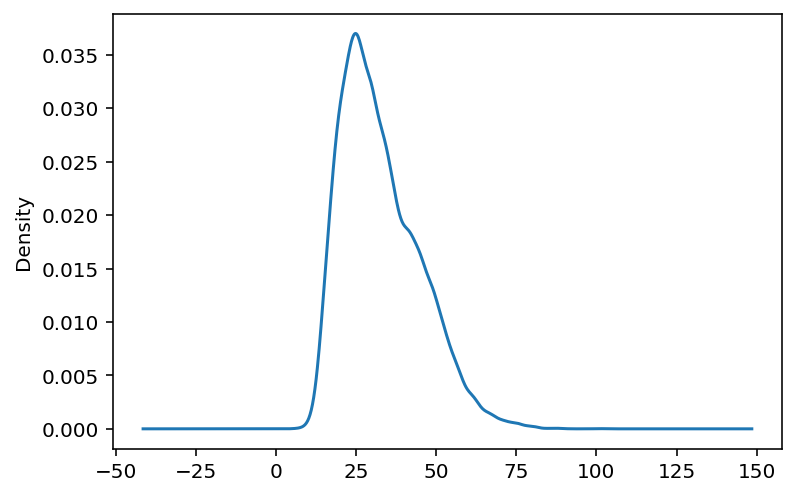

In [12]:
df["complainant_age_incident"].plot.kde()

From above plot, we can find that after the data cleaning, there is no more outliers about the age. For example, no age below 0.

distribution of the mos age. (Another graph related to age, which is useful to giving us a sense about the most majority people's age here)

<AxesSubplot:ylabel='Density'>

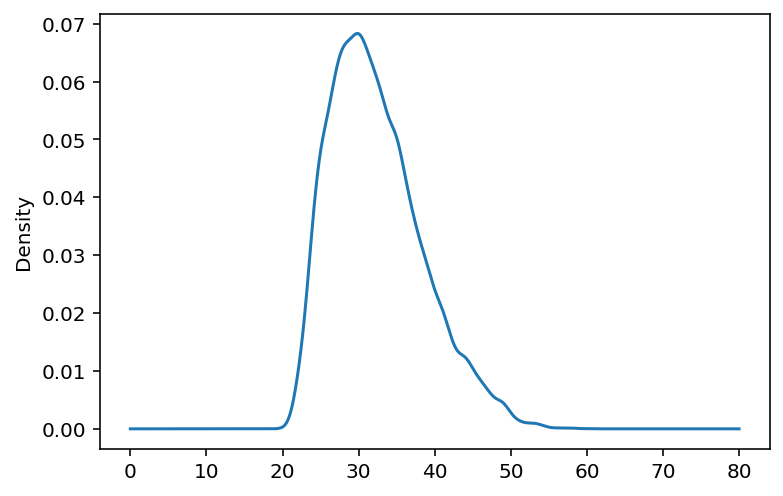

In [13]:
df["mos_age_incident"].plot.kde()

Distribution of ethinicity of mos( So as to have a sense of how the enthinity distributed, the pie chart is the best choice.)

Here we can see the white alomst dominates the ethnicity. This is quite helpful in later analysis.

<AxesSubplot:ylabel='mos_ethnicity'>

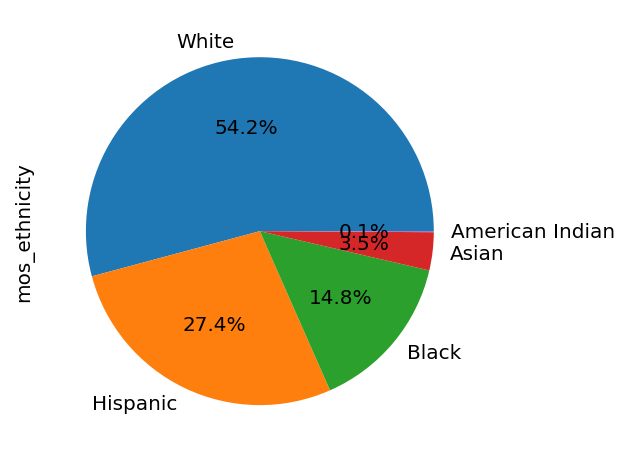

In [14]:
df.mos_ethnicity.value_counts().plot(kind='pie',autopct='%1.1f%%')

Distribution of gender of mos

Since we will analyze "Are the complaints of women more succesful than men (for the same allegations?)", here we utilized the pie chart to gain the sense what percentage of man and woman.

<AxesSubplot:ylabel='mos_gender'>

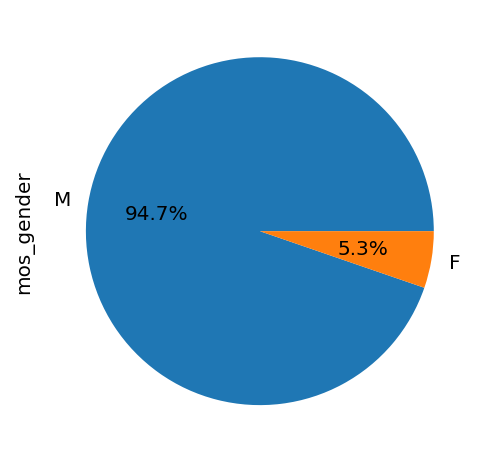

In [15]:
df.mos_gender.value_counts().plot(kind='pie',autopct='%1.1f%%')

Distribution of complainant_ethnicity.

Possising a sense of what the percentages of majority ethnicities, the following graph tells about the complainant ethnicity. 

Among all complainants, the Black dominates, or have the most largest number, among all ethnicity. This is different from the overall ethnicity behavior from above.

<AxesSubplot:>

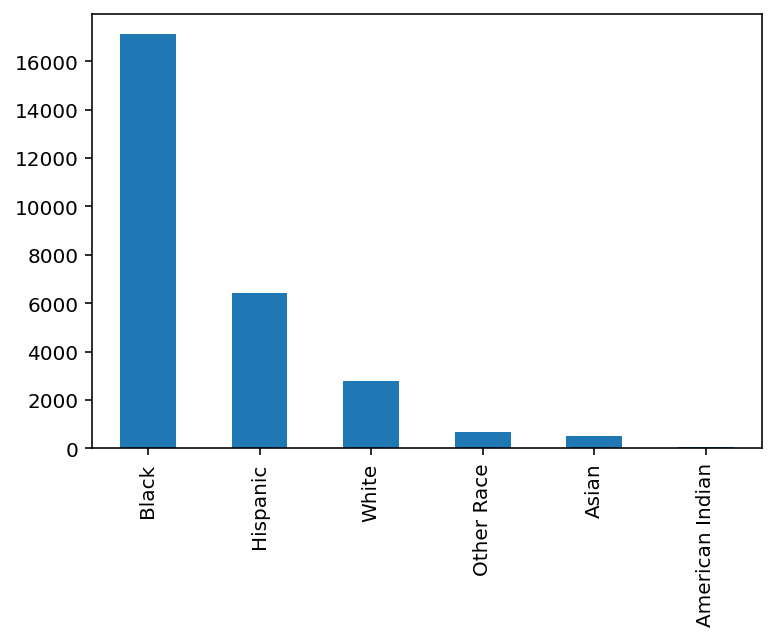

In [16]:
df.complainant_ethnicity.value_counts().plot(kind='bar')

Distribution of complainant_gender

Same as above, Male dominates both complainant and mos gender. They have the largest amount of people.

<AxesSubplot:>

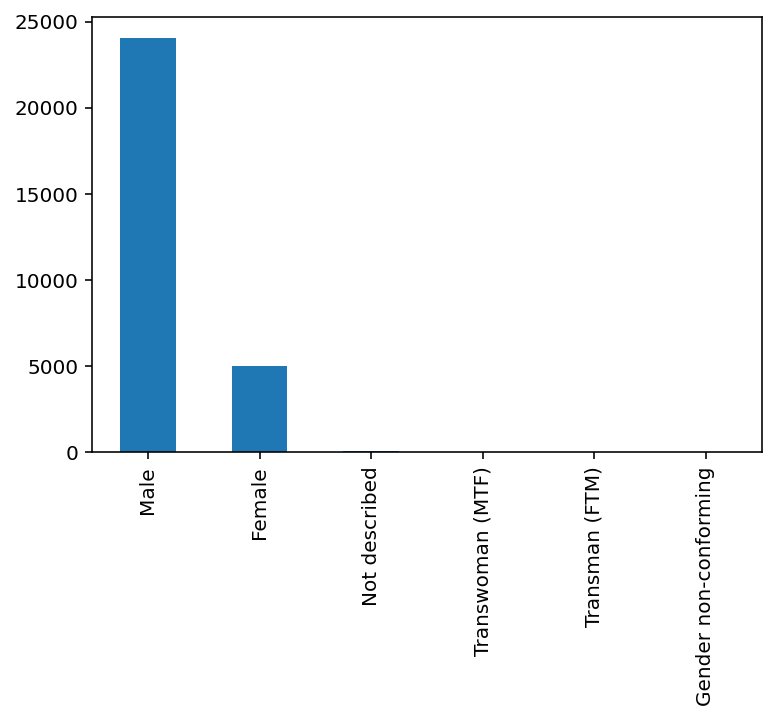

In [17]:
df.complainant_gender.value_counts().plot(kind="bar")

#### Bivariate Analysis and Group By

The Pivot table below show the rate of the a success complaint based on the fado type and complainant gender

In [18]:
pivot = df.pivot_table(index =['fado_type', 'complainant_gender'], 
                       values =['substantiated'], aggfunc ='mean')
pivot

substantiated
fado_type          complainant_gender                  
Abuse of Authority Female                      0.261297
                   Gender non-conforming       1.000000
                   Male                        0.320964
                   Not described               0.216216
                   Transman (FTM)              1.000000
                   Transwoman (MTF)            0.571429
Discourtesy        Female                      0.187623
                   Male                        0.223289
                   Not described               0.300000
                   Transman (FTM)              0.500000
                   Transwoman (MTF)            0.500000
Force              Female                      0.086998
                   Male                        0.116142
                   Not described               0.285714
                   Transman (FTM)              0.000000
                   Transwoman (MTF)            0.000000
Offensive Language Female                      0.154930
                   Male                        0.160183
                   Not described               0.333333
                   Transman (FTM)              0.000000
                   Transwoman (MTF)            0.666667

In [19]:
df.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'complaint_id',
       'month_received', 'year_received', 'month_closed', 'year_closed',
       'mos_ethnicity', 'mos_gender', 'mos_age_incident',
       'complainant_ethnicity', 'complainant_gender',
       'complainant_age_incident', 'fado_type', 'allegation',
       'board_disposition', 'WNW_mos', 'substantiated'],
      dtype='object')

Find out the relationships and behaviors between ages and each group of ethinicity, we used box plots

Text(0.5, 1.0, 'Age by ethinicity for MOS')

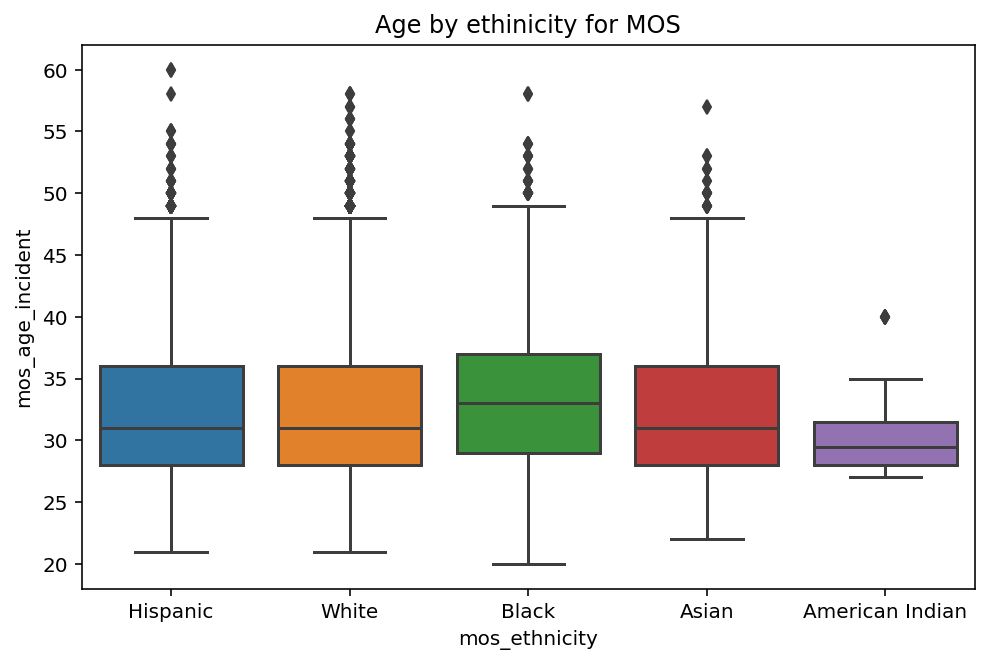

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='mos_ethnicity',y='mos_age_incident',data = df)
plt.title("Age by ethinicity for MOS")

Text(0.5, 1.0, 'Age by ethinicity for complainants')

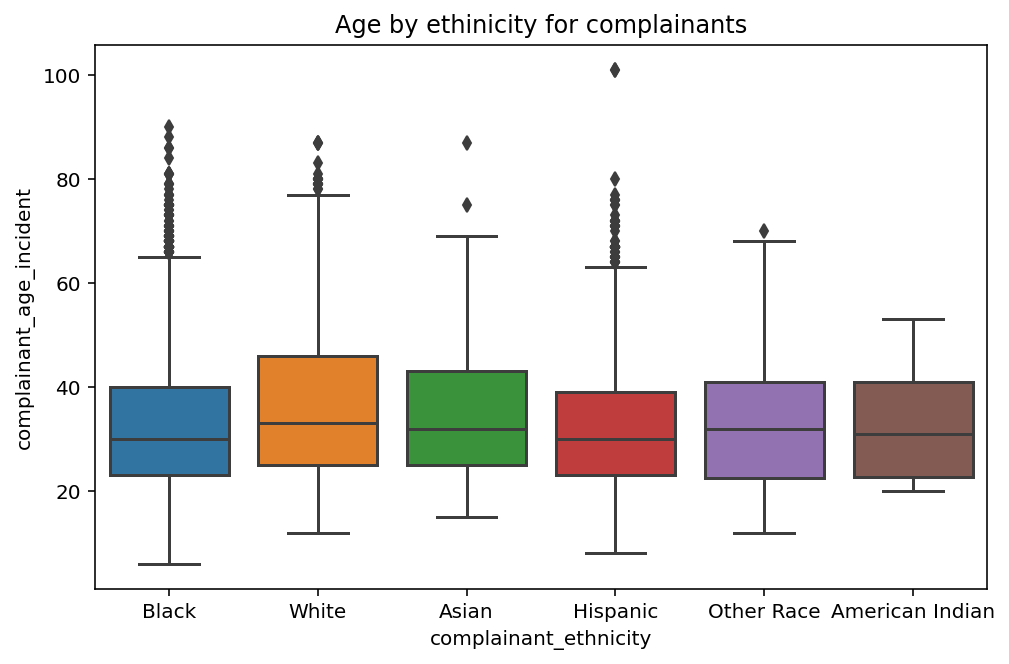

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='complainant_ethnicity',y='complainant_age_incident',data = df)
plt.title("Age by ethinicity for complainants")

In [22]:
# show the ratio of result of the case is substatiated based on whether or not the MOS race is white
df.groupby(["WNW_mos"])["substantiated"].agg(np.mean)

WNW_mos
NW    0.257197
W     0.241784
Name: substantiated, dtype: float64

In [23]:
# show the ratio of result of the case is substatiated based on ethnicity of the complainant
df.groupby(["complainant_ethnicity"])["substantiated"].agg(np.mean)

complainant_ethnicity
American Indian    0.359375
Asian              0.291353
Black              0.237992
Hispanic           0.244707
Other Race         0.268833
White              0.279195
Name: substantiated, dtype: float64

Both box plot and the numbers above shows the consistency.

In [24]:
# show the ratio of result of the case is substatiated based on gender of the MOS

df.groupby(["mos_gender"])["substantiated"].agg(np.mean)

mos_gender
F    0.360227
M    0.242642
Name: substantiated, dtype: float64

In [25]:
# show the ratio of result of the case is substatiated based on gender of the complainant

df.groupby(["complainant_gender"])["substantiated"].agg(np.mean)

complainant_gender
Female                   0.205537
Gender non-conforming    1.000000
Male                     0.255674
Not described            0.245614
Transman (FTM)           0.400000
Transwoman (MTF)         0.550000
Name: substantiated, dtype: float64

The result is a little bit different here, in mos_gender, the female has a higher ratio of result of the case is substatiated. But this result changed when we focus on complainant gender.

### Assessment of Missingness

So as to have a better understanding of the data set, in this part, we will most focus on the missingness of complainant ethnicity column and complainant gender, which are also related to the questions we interested in.(In this part, we import a py file called util, where are the code to do the permutation test and ks test.And the exact code in this file is showed at the end of this notebook)

There are 5764 empty values in the complainant ethnicity column

There are 4195 empty values in the complainant ethnicity column

In [26]:
df.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'complaint_id',
       'month_received', 'year_received', 'month_closed', 'year_closed',
       'mos_ethnicity', 'mos_gender', 'mos_age_incident',
       'complainant_ethnicity', 'complainant_gender',
       'complainant_age_incident', 'fado_type', 'allegation',
       'board_disposition', 'WNW_mos', 'substantiated'],
      dtype='object')

In [27]:
# Find the number of data points that is missing
(df["complainant_ethnicity"].isnull()).sum()

5764

In [28]:
(df["complainant_gender"].isnull()).sum()

4195

In [29]:
# Make a new column with true and false. True means the data point is not missing, False means missing
df['race_isnull'] = df.complainant_ethnicity.isnull()

In [30]:
# Make a new column with true and false. True means the data point is not missing, False means missing
df['gender_isnull'] = df.complainant_gender.isnull()

#### Check whether or not the complainant ethnicity is missing basd on the complainant age
Here we did a tricky thing. Since the ethnicity is categorical, and the age is numerical. So if we show age is independent to the ethnicity, it is as same as ethnicity is indenpendent to the age. And by this way, it is easier to plot and do the ks test.

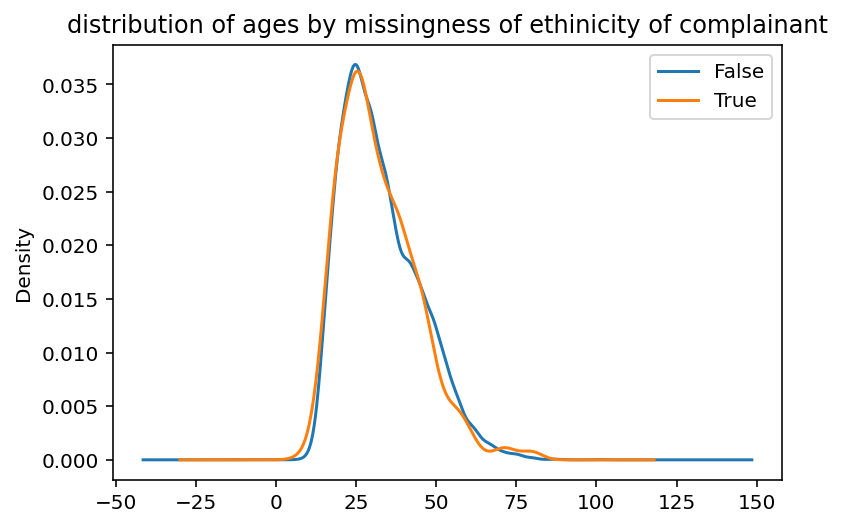

In [31]:
df.groupby('race_isnull').complainant_age_incident.plot(kind='kde', title='distribution of ages by missingness of ethinicity of complainant', legend=True);

The two distribution looks very similar, but we will still perform a ks-stats permutation test

In [32]:
import util
ks, obs = util.permutation_test(
    df.assign(is_null = df.complainant_ethnicity.isnull()), 
    'complainant_age_incident',  'is_null', util.ks)

pval = np.mean(np.array(ks) > obs)
pval

0.0

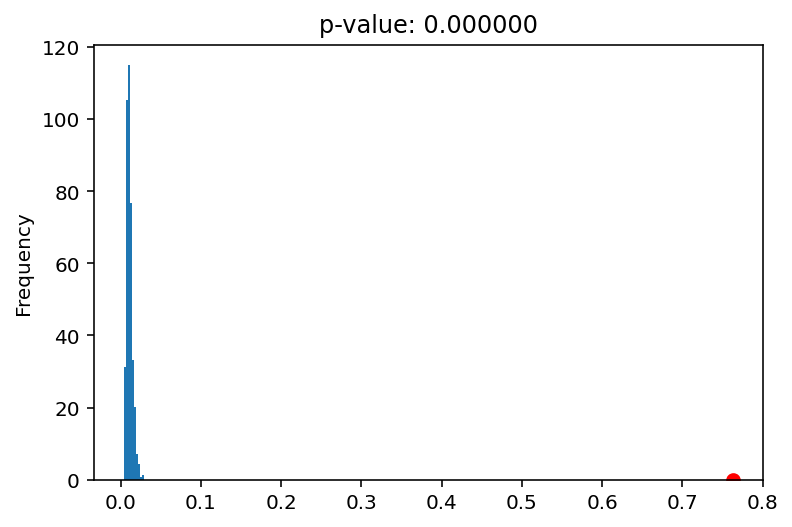

In [33]:
pd.Series(ks).plot(kind='hist', density=True, title='p-value: %f' % pval)

plt.scatter(obs, 0, color='red', s=40);

The graph shows that the distribution of missing and non-missing is almost same. 

But by doing the permutation test with default N = 1000(can be checked in util.py file), we find out that the p-value is 0 which means we reject the null hypothsis when we set 0.05 as default. Here the null hypothsis is the two distribution is same, and alternative is two distribution is not same. So even we looked the distribution is almost same, but they are not same at all.

So from both the plot and the p-value of ks test, we can conclude that the missingness of complainant ethnicity is dependent to the complainant age.

#### Check whether or not the complainant gender is missing basd on age

Here we do the same thing as above but chenge the variable to gender

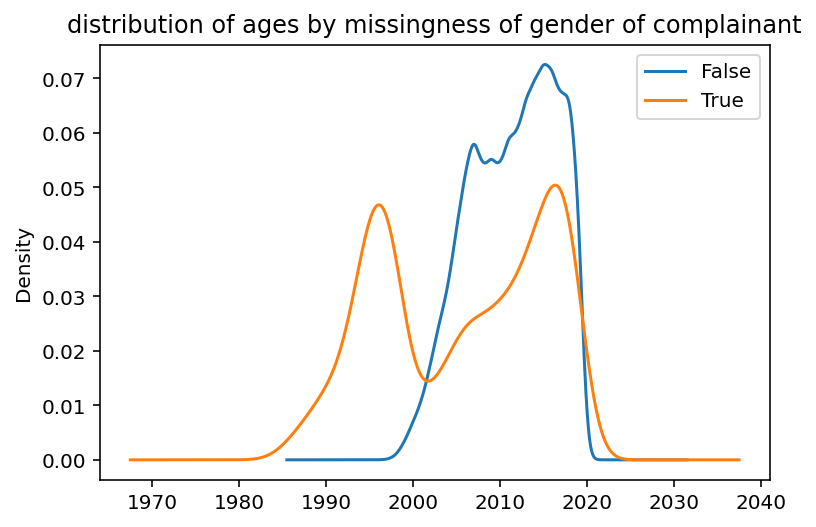

In [34]:
df.groupby('gender_isnull').year_received.plot(kind='kde', title='distribution of ages by missingness of gender of complainant', legend=True);

From the above graph,we can see that the distribution is not similar at all. But so as to make it as accurate as possible, we still do the ks test.

In [35]:
import util
ks, obs = util.permutation_test(
    df.assign(is_null = df.complainant_gender.isnull()), 
    'complainant_age_incident',  'is_null', util.ks)

pval = np.mean(np.array(ks) > obs)
pval

0.0

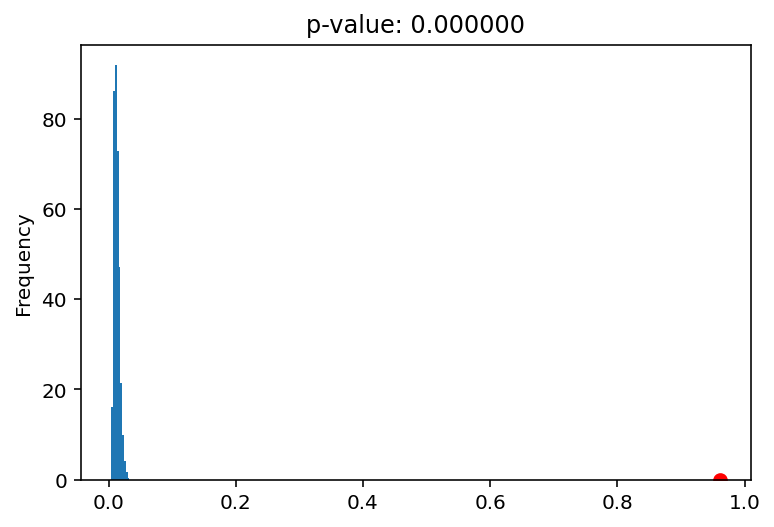

In [36]:
pd.Series(ks).plot(kind='hist', density=True, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);

In this case, both graph and permutation test showed that the distribution is not similar. The permutation test with default N = 1000(can be checked in util.py file), we find out that the p-value is 0 which means we reject the null hypothsis when we set 0.05 as default. Here the null hypothsis is the two distribution is same, and alternative is two distribution is not same. 

So from both the plot and the p-value of ks test, we can conclude that the missingness of complainant gender is dependent to the complainant age.

#### Check whether or not the complainant gender is missing basd on substantiated

Since substantiated only contains 1 and 0, we treat it as a categoral variable. So in this test, we will use TVD test.

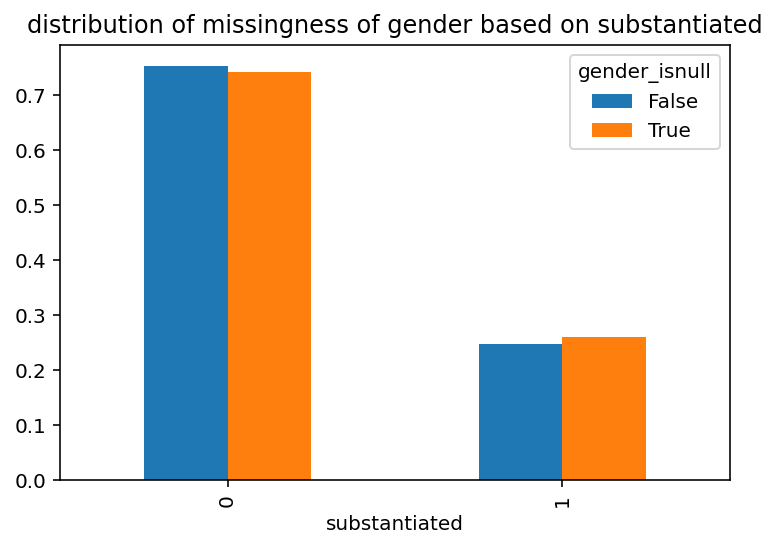

In [37]:
distributions = (
    df
    .pivot_table(columns='gender_isnull', index='substantiated', values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x:x/x.sum())
)

distributions.plot(kind='bar', title='distribution of missingness of gender based on substantiated');

In [38]:
import util
tvds, obs = util.permutation_test(
    df.assign(is_null = df.complainant_gender.isnull()), 
    'substantiated',  'is_null', util.tvd)

p = np.count_nonzero(tvds >= obs) / len(tvds)
p

0.096

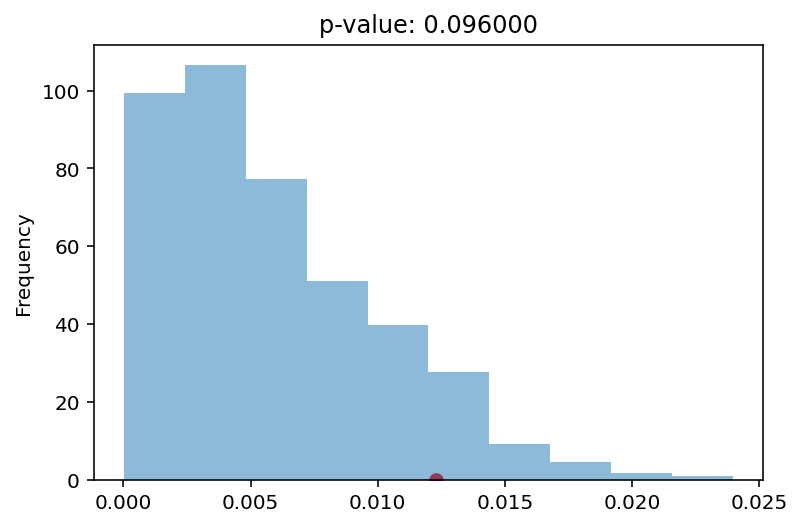

In [39]:
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.5, title='p-value: %f' % p)
plt.scatter(obs, 0, color='red', s=40);

By doing the TVD permutation test with default N = 1000(can be checked in util.py file), we find out that the p-value is 0.096 which is larger than the default 0.05. So we failed reject the null hypothsis. That means the missingness of complainant gender is independent to the substantiated variable.

### Hypothesis Test

#### In this part the default significance level is 0.05

The questions we want to address are the following two:

1.Are white-officer vs non-white complaintant cases more likely to go against the complainant?

2.Are the complaints of women more succesful than men (for the same allegations?)

#### Question 1

##### What the CCRB’s Conclusions Mean

Substantiated: The alleged conduct occurred and it violated the rules. (Here is a breakdown of the types of discipline the CCRB can recommend. The NYPD can choose to ignore those recommendations. It has discretion over what, if any, discipline is imposed.)

Exonerated: The alleged conduct occurred but did not violate the NYPD’s rules, which often give officers significant discretion over use of force.

Unsubstantiated: The CCRB has fully investigated but could not affirmatively conclude both that the conduct occurred and that it broke the rules.

citation: https://www1.nyc.gov/site/ccrb/investigations/case-outcomes.page

Hypothesis:

null hypothesis: the white_officer vs non-white complaintant cases are the same likely to go against the complainant as the other ethinicities(against means that the the case is not substantiated).

alternative hypothesis: white-officer vs non-white complaintant cases more likely to go against the complainant



In [40]:
# Get the first group of data so that we can get find the mean and then the test stat
test_data = df[(df["WNW_mos"] == "W") & (df["complainant_ethnicity"] != "White") & (df["complainant_ethnicity"].notnull())]
# The other group 
other_data = df[~((df["WNW_mos"] == "W") & (df["complainant_ethnicity"] != "White") & (df["complainant_ethnicity"].notnull()))]
test_stats = (1-test_data["substantiated"].mean()) - (1-other_data["substantiated"].mean())
test_stats

0.018361266787803143

With the test stats, we set N = 1000 to do the permutation test

In [41]:
N_trials =  1000
mean_dif = []

for i in np.arange(N_trials):
    df['shuffle_column'] = df["WNW_mos"].sample(frac=1).values
    df["shuffle_column_2"] = df["complainant_ethnicity"].sample(frac=1).values
    data1 = df[(df["shuffle_column"] == "W") & (df["shuffle_column_2"] != "White") & (df["shuffle_column_2"].notnull())]
    data2 = df[~((df["shuffle_column"] == "W") & (df["shuffle_column_2"] != "White") & (df["shuffle_column_2"].notnull()))]
    stats = (1-data1["substantiated"].mean()) - (1-data2["substantiated"].mean())
    mean_dif.append(stats)
    
mean_dif = np.array(mean_dif)


P-Value

In [42]:
(mean_dif >= test_stats).mean()

0.001

p_value equal to 0.001 which is much smaller than 0.05, so we reject the null hypothesis and can conclude that the white_officer vs non-white complaintant cases are not same likely to go against the complainant as the other ethinicities

## question 2

Are the complaints of women more succesful than men (for the same allegations?)

null hypothesis: for the same allegation, the complaints of women is equally successful compared to the the men

alternative hypothesis: for the same allegation, the complaints of women are more successful than men

##### Some data processing so that we can get the test stats
Create a new data frame to only contains the data needed

In [43]:
df_new = df[(df["complainant_gender"] == "Female") | (df["complainant_gender"] == "Male")]

In [44]:
df3 = df_new.groupby(["allegation","complainant_gender"]).mean()["substantiated"]
df3.index
df3 = df3.reset_index()

In [45]:
v = df3.allegation.value_counts()
df3[df3.allegation.isin(v.index[v.gt(1)])]
df3.head()

,allegation,complainant_gender,substantiated
0,Action,Female,0.261538
1,Action,Male,0.323651
2,Animal,Male,0.000000
3,Body Cavity Searches,Male,0.333333
4,Chokehold,Female,0.166667


Get test stats

In [46]:
num = 0
for i in df3["allegation"].unique():
    male_data = df3[(df3["allegation"] == i) & (df3["complainant_gender"] == "Male")]["substantiated"].values
    female_data = df3[(df3["allegation"] == i) & (df3["complainant_gender"] == "Female")]["substantiated"].values
    if female_data >male_data:
        num+=1
        
test_stats = num / df3["allegation"].nunique()
test_stats

<ipython-input-46-caaea89b149f>:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if female_data >male_data:


0.24390243902439024

Set N = 100 to do the permutation test

In [47]:
N_trials =  100
ratios = []

for i in np.arange(N_trials):
    df['shuffle_column'] = df["complainant_gender"].sample(frac=1).values
    df_new = df[(df["shuffle_column"] == "Female") | (df["shuffle_column"] == "Male")]
    df3 = df_new.groupby(["allegation","shuffle_column"]).mean()["substantiated"]
    df3 = df3.reset_index()
    v = df3.allegation.value_counts()
    df3[df3.allegation.isin(v.index[v.gt(1)])]
    num = 0
    for i in df3["allegation"].unique():
        male_data = df3[(df3["allegation"] == i) & (df3["shuffle_column"] == "Male")]["substantiated"].values
        female_data = df3[(df3["allegation"] == i) & (df3["shuffle_column"] == "Female")]["substantiated"].values
        if female_data >male_data:
            num+=1

    stats = num / df3["allegation"].nunique()
    ratios.append(stats)

ratios_lst = np.array(ratios)
ratios_lst

<ipython-input-47-e35068925e67>:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if female_data >male_data:
<ipython-input-47-e35068925e67>:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if female_data >male_data:
<ipython-input-47-e35068925e67>:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if female_data >male_data:
<ipython-input-47-e35068925e67>:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if female_data >mal

<ipython-input-47-e35068925e67>:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if female_data >male_data:
<ipython-input-47-e35068925e67>:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if female_data >male_data:
<ipython-input-47-e35068925e67>:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if female_data >male_data:
<ipython-input-47-e35068925e67>:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if female_data >mal

<ipython-input-47-e35068925e67>:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if female_data >male_data:
<ipython-input-47-e35068925e67>:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if female_data >male_data:
<ipython-input-47-e35068925e67>:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if female_data >male_data:
<ipython-input-47-e35068925e67>:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if female_data >mal

array([0.37719298, 0.42608696, 0.3826087 , 0.3826087 , 0.3826087 ,
       0.39130435, 0.38596491, 0.36521739, 0.29824561, 0.35087719,
       0.36842105, 0.35087719, 0.32173913, 0.39130435, 0.40869565,
       0.31304348, 0.39823009, 0.40869565, 0.42477876, 0.32173913,
       0.4173913 , 0.36842105, 0.33913043, 0.43859649, 0.44347826,
       0.39130435, 0.35652174, 0.34513274, 0.3539823 , 0.35652174,
       0.36521739, 0.37391304, 0.42477876, 0.35652174, 0.38053097,
       0.4       , 0.35652174, 0.33913043, 0.37719298, 0.3826087 ,
       0.28947368, 0.39130435, 0.39823009, 0.39130435, 0.32173913,
       0.42982456, 0.35652174, 0.36521739, 0.30630631, 0.3245614 ,
       0.35087719, 0.4173913 , 0.37719298, 0.33913043, 0.35087719,
       0.38596491, 0.33913043, 0.4159292 , 0.40707965, 0.46902655,
       0.39130435, 0.36842105, 0.39130435, 0.38596491, 0.47368421,
       0.47368421, 0.32173913, 0.33913043, 0.37719298, 0.35652174,
       0.36521739, 0.36842105, 0.3826087 , 0.24778761, 0.38596

p-value

In [48]:
(ratios_lst <= test_stats).mean()

0.0

p_value equal to 0 which is smaller than 0.05, so we reject the null hypothesis and can conclude that for the same allegation, the complaints of women are more successful than men.

Following are the codes we used as imported file which is util.py above

In [ ]:
import numpy as np

# ---------------------------------------------------------------------
# Permutation Test Helper function
# ---------------------------------------------------------------------


def permutation_test(data, col, group_col, test_statistic, N=1000):
    """
    Return the distribution of permuted statistics and the observed statistic
    resulting from a permutation test.

    :param: data: DataFrame of data observations and the labels for two groups.
    :param: col: Column name for the column containing the data.
    :param: group_col: Column name for the column contain the labels for the two groups.
    :param: test_statistic: The test statistic to apply to the groups (a function).
    :param: N: The number of times N to run the permutation test.
    """

    # get the observed test statistic
    obs = test_statistic(data, col, group_col)

    # run the permutations
    shuffled_stats = []
    for _ in range(N):

        shuffled = data[group_col].sample(
            frac=1, replace=False).reset_index(drop=True)
        with_shuffled = data[[col]].assign(shuffled=shuffled)
        shuffled_stat = test_statistic(with_shuffled, col, 'shuffled')
        shuffled_stats.append(shuffled_stat)

    shuffled_stats = np.array(shuffled_stats)

    return shuffled_stats, obs


def diff_in_means(data, col, group_col):
    """difference in means"""
    return data.groupby(group_col)[col].mean().diff().iloc[-1]


def tvd(data, col, group_col):
    """tvd of the distribution of values in col
    bewteen the two groups of group_col. col is
    assumed to be categorical."""

    tvd = (
        data
        .pivot_table(
            index=col,
            columns=group_col,
            aggfunc='size',
            fill_value=0
    t
        .apply(lambda x: x / x.sum())
        .diff(axis=1).iloc[:, -1].abs().sum() / 2
    )

    return tvd


def ks(data, col, group_col):
    """tvd of the distribution of values in col
    bewteen the two groups of group_col. col is
    assumed to be categorical."""

    from scipy.stats import ks_2samp

    # should have only two values in column
    valA, valB = data[group_col].unique()
    ks, _ = ks_2samp(
        data.loc[data[group_col] == valA, col],
        data.loc[data[group_col] == valB, col]
    )

    return ks


# ---------------------------------------------------------------------
# Create different types of missing data
# ---------------------------------------------------------------------

def make_mcar(data, col, pct=0.5):
    """Create MCAR from complete data"""
    missing = data.copy()
    idx = data.sample(frac=pct, replace=False).index
    missing.loc[idx, col] = np.NaN
    return missing


def make_mar_on_cat(data, col, dep_col, pct=0.5):
    """Create MAR from complete data. The dependency is
    created on dep_col, which is assumed to be categorical.
    This is only *one* of many ways to create MAR data.
    For the lecture examples only."""

    missing = data.copy()
    # pick one value to blank out a lot
    high_val = np.random.choice(missing[dep_col].unique())
    weights = missing[dep_col].apply(lambda x: 0.9 if x == high_val else 0.1)
    idx = data.sample(frac=pct, replace=False, weights=weights).index
    missing.loc[idx, col] = np.NaN

    return missing


def make_mar_on_num(data, col, dep_col, pct=0.5):
    """Create MAR from complete data. The dependency is
    created on dep_col, which is assumed to be numeric.
    This is only *one* of many ways to create MAR data.
    For the lecture examples only."""

    thresh = np.percentile(data[dep_col], 50)

    def blank_above_middle(val):
        if val >= thresh:
            return 0.75
        else:
            return 0.25

    missing = data.copy()
    weights = missing[dep_col].apply(blank_above_middle)
    idx = missing.sample(frac=pct, replace=False, weights=weights).index

    missing.loc[idx, col] = np.NaN
    return missing



##### Gender non-conforming definition: 
Gender nonconformity is simply not conforming to gender roles. In practice, it can mean things as simple as a woman wearing a tie or something as complex and life-changing as adopting new pronouns.

citation: https://www.verywellmind.com/gender-nonconforming-definition-4582878